In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
ages = []
with (open("practice_outliers_ages.pkl", "rb")) as openfile:
    while True:
        try:
            ages.append(pickle.load(openfile))
        except EOFError:
            break

In [3]:
ages = np.array(ages[0]).reshape(-1,1)

In [4]:
net_worths = []
with (open("practice_outliers_net_worths.pkl", "rb")) as openfile:
    while True:
        try:
            net_worths.append(pickle.load(openfile))
        except EOFError:
            break

In [5]:
net_worths = np.array(net_worths[0]).reshape(-1,1)

In [6]:
from sklearn.cross_validation import train_test_split

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)




from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
reg.predict(ages_test)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([[334.9637908 ],
       [345.11965208],
       [172.47001021],
       [177.54794085],
       [142.00242634],
       [258.79483114],
       [202.93759407],
       [253.7169005 ],
       [177.54794085],
       [274.02862307]])

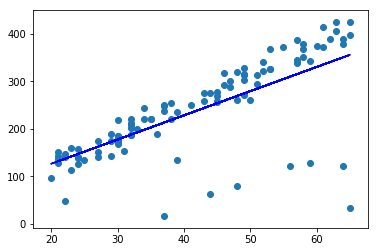

In [7]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [8]:
reg.coef_

array([[5.07793064]])

In [9]:
reg.score(ages_test, net_worths_test)

0.8782624703664675

In [10]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    

    ### your code goes here
    err = (predictions - net_worths)**2
    idx = err[:,0].argsort()
    cleaned_data = [(ages[i][0], net_worths[i][0], err[i][0]) for i in idx[:int(0.9*len(idx))]]

    
    return cleaned_data

In [11]:
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")


In [12]:
cleaned_data[:5]

[(30, 177.46485912830926, 0.006902572286934023),
 (32, 187.0976049078975, 0.36747507902456666),
 (29, 173.54835439167368, 1.162826184063262),
 (32, 186.46155999388083, 1.5431655389711973),
 (49, 271.75164334973937, 5.184636665643252)]

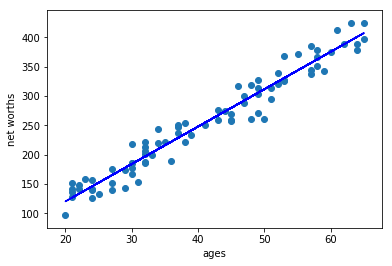

In [13]:
### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")

In [14]:
reg.intercept_

array([-6.91861069])

In [15]:
reg.coef_

array([[6.36859481]])

In [16]:
reg.score(ages_test, net_worths_test)

0.983189455395532